In [38]:
#імпортування бібліотеки для аналізу
import pandas as pd
import numpy as np

In [72]:
#Зчитування датасету
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
gdp_table = tables[2]

In [48]:
#Вивід перших 5 рядків датасету
print(gdp_table.head(5))


  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  


In [42]:
#Визначити розмір датасету
dataset_size = gdp_table.shape
print("Розмір датасету:",dataset_size)

Розмір датасету: (210, 7)


In [43]:
#Визначити оптимальну кількість стовпців
print("Кількість стовпців:", gdp_table.shape[1])


Кількість стовпців: 7


In [73]:
#Змінити назви стовпців на більш зручні
gdp_table.columns = ["Country", "MVF_2024", "Year_2024", "WorldBank_2023", "Year_2023", "OON_2022", "Year_2022"]
print("Нові назви стовпців:", gdp_table.columns)



Нові назви стовпців: Index(['Country', 'MVF_2024', 'Year_2024', 'WorldBank_2023', 'Year_2023',
       'OON_2022', 'Year_2022'],
      dtype='object')


In [37]:
#Визначити типи даних
print("Типи даних у стовпцях:")
print(gdp_table.dtypes)

Типи даних у стовпцях:
Country           object
MVF_2024          object
Year_2024         object
WorldBank_2023    object
Year_2023         object
OON_2022          object
Year_2022         object
dtype: object


In [74]:
#Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень.
#При наявності, замінити пропущені значення на середнє значення.
print("Пропущені значення до заміни:")
print(gdp_table.isna().sum())
gdp_table.replace("—", np.nan, inplace=True)
print("Пропущені значення після заміни:")
print(gdp_table.isna().sum())
non_numeric_cols = ['Country','Year_2022', 'Year_2024', 'Year_2023'] 
numeric_cols = gdp_table.select_dtypes(include=['object']).columns.difference(non_numeric_cols)
gdp_table[numeric_cols] = gdp_table[numeric_cols].apply(pd.to_numeric, errors='coerce')
gdp_table.fillna(gdp_table.mean(), inplace=True)
print("Пропущені значення після заповнення:")
print(gdp_table.isna().sum())



Пропущені значення до заміни:
Country           0
MVF_2024          0
Year_2024         0
WorldBank_2023    0
Year_2023         0
OON_2022          0
Year_2022         0
dtype: int64
Пропущені значення після заміни:
Country            0
MVF_2024          15
Year_2024         15
WorldBank_2023     8
Year_2023          8
OON_2022           1
Year_2022          1
dtype: int64
Пропущені значення після заповнення:
Country            0
MVF_2024           0
Year_2024         15
WorldBank_2023     0
Year_2023          8
OON_2022           0
Year_2022          1
dtype: int64


C:\Users\Саша\AppData\Local\Temp\ipykernel_7840\855581728.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gdp_table.fillna(gdp_table.mean(), inplace=True)


In [76]:
#Ще раз перевірити наявність пропущених значень
print("Пропущені значення після заповнення:")
print(gdp_table.isna().sum())

Пропущені значення після заповнення:
Country            0
MVF_2024           0
Year_2024         15
WorldBank_2023     0
Year_2023          8
OON_2022           0
Year_2022          1
dtype: int64


In [77]:
#Перевірити наявність дублікатів. При наявності видалити дублікати.
duplicates = gdp_table.duplicated().sum()
print("Кількість дублікатів:", duplicates)

gdp_table.drop_duplicates(inplace=True)

Кількість дублікатів: 0


In [80]:
#Вивести описову статистику датасету describe()
print("Описова статистика:")
print(gdp_table.describe())

Описова статистика:
           MVF_2024  WorldBank_2023      OON_2022
count  2.100000e+02    2.100000e+02  2.100000e+02
mean   1.123228e+06    1.037206e+06  9.612699e+05
std    7.900707e+06    7.602076e+06  7.275608e+06
min    6.600000e+01    6.200000e+01  5.900000e+01
25%    1.464775e+04    1.044175e+04  8.928250e+03
50%    6.215800e+04    4.341600e+04  3.210250e+04
75%    4.366365e+05    3.376592e+05  2.412485e+05
max    1.095292e+08    1.054355e+08  1.008348e+08


In [96]:
#Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни.
#У яких країнах ці показники найбільше відрізняються
gdp_table['Deviation'] = gdp_table['MVF_2024'] - gdp_table['WorldBank_2023']
print(gdp_table.head(5))
filtered_table = gdp_table[gdp_table['Country'] != 'World']
max_deviation_country = filtered_table.loc[filtered_table['Deviation'].idxmax()]['Country']
print(f"Країна з найбільшим відхиленням: {max_deviation_country}")


         Country     MVF_2024  Year_2024  WorldBank_2023  Year_2023  \
0          World  109529216.0       2024     105435540.0       2023   
1  United States   28781083.0       2024      27360935.0       2023   
2          China   18532633.0  [n 1]2024      17794782.0  [n 3]2023   
3        Germany    4591100.0       2024       4456081.0       2023   
4          Japan    4110452.0       2024       4212945.0       2023   

      OON_2022  Year_2022  Deviation  Std_Deviation  
0  100834796.0       2022  4093676.0   4.349674e+06  
1   25744100.0       2022  1420148.0   1.519553e+06  
2   17963170.0  [n 1]2022   737851.0   3.866667e+05  
3    4076923.0       2022   135019.0   2.665736e+05  
4    4232173.0       2022  -102493.0   6.543512e+04  
Країна з найбільшим відхиленням: United States


In [86]:
#Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022.
#Які пари змінних мають найвищу кореляцію?
correlation = gdp_table[["MVF_2024", "WorldBank_2023", "OON_2022"]].corr()
print("Кореляція між показниками:")
print(correlation)
#Найбільшу кореляцію мають пари (WorldBank_2023, MVF_2024), (OON_2022, WorldBank_2023)

Кореляція між показниками:
                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999351  0.999246
WorldBank_2023  0.999351        1.000000  0.999656
OON_2022        0.999246        0.999656  1.000000


In [88]:
#Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022).
#Як це середнє значення змінюється між роками?
mean_values = gdp_table[["MVF_2024", "WorldBank_2023", "OON_2022"]].mean()
print("Середні значення для кожного стовпця:")
print(mean_values)
ukraine_data = gdp_table[gdp_table['Country'] == 'Ukraine']
mean_mvf_ua = ukraine_data['MVF_2024'].mean()
mean_wb_ua = ukraine_data['WorldBank_2023'].mean()
mean_oon_ua = ukraine_data['OON_2022'].mean()
print(f'MVF 2024 mean for Ukraine: {mean_mvf_ua}')
print(f'WorldBank 2023 mean for Ukraine: {mean_wb_ua}')  
print(f'OON 2022 mean for Ukraine: {mean_oon_ua}')
#Середнє значення збільшувалось в Україні

Середні значення для кожного стовпця:
MVF_2024          1.123228e+06
WorldBank_2023    1.037206e+06
OON_2022          9.612699e+05
dtype: float64
MVF 2024 mean for Ukraine: 188943.0
WorldBank 2023 mean for Ukraine: 178757.0
OON 2022 mean for Ukraine: 160502.0


In [97]:
#Обчисліть стандартне відхилення показників для кожної країни.
#Яка країна має найвищу варіативність у показниках між роками?
gdp_table['Std_Deviation'] = gdp_table[["MVF_2024", "WorldBank_2023", "OON_2022"]].std(axis=1)
filtered_table = gdp_table[gdp_table['Country'] != 'World']
max_variability_country = filtered_table.loc[filtered_table['Std_Deviation'].idxmax()]['Country']
print(gdp_table.head(5))
print(f"Країна з найвищою варіативністю: {max_variability_country}")


         Country     MVF_2024  Year_2024  WorldBank_2023  Year_2023  \
0          World  109529216.0       2024     105435540.0       2023   
1  United States   28781083.0       2024      27360935.0       2023   
2          China   18532633.0  [n 1]2024      17794782.0  [n 3]2023   
3        Germany    4591100.0       2024       4456081.0       2023   
4          Japan    4110452.0       2024       4212945.0       2023   

      OON_2022  Year_2022  Deviation  Std_Deviation  
0  100834796.0       2022  4093676.0   4.349674e+06  
1   25744100.0       2022  1420148.0   1.519553e+06  
2   17963170.0  [n 1]2022   737851.0   3.866667e+05  
3    4076923.0       2022   135019.0   2.665736e+05  
4    4232173.0       2022  -102493.0   6.543512e+04  
Країна з найвищою варіативністю: United States


In [101]:
#Визначення країни з найвищим та найнижчим показниками:
#Знайдіть країну з найвищим та найнижчим показниками у
#кожному з років (MVF_2024, WorldBank_2023, OON_2022).
max_mvf_2024_country = filtered_table.loc[filtered_table['MVF_2024'].idxmax()]['Country']
min_mvf_2024_country = filtered_table.loc[filtered_table['MVF_2024'].idxmin()]['Country']
max_wb_2023_country = filtered_table.loc[filtered_table['WorldBank_2023'].idxmax()]['Country']
min_wb_2023_country = filtered_table.loc[filtered_table['WorldBank_2023'].idxmin()]['Country']
max_oon_2022_country = filtered_table.loc[filtered_table['OON_2022'].idxmax()]['Country']
min_oon_2022_country = filtered_table.loc[filtered_table['OON_2022'].idxmin()]['Country']

print(f"Країна з найвищим MVF_2024: {max_mvf_2024_country}")
print(f"Країна з найнижчим MVF_2024: {min_mvf_2024_country}")
print(f"Країна з найвищим WorldBank_2023: {max_wb_2023_country}")
print(f"Країна з найнижчим WorldBank_2023: {min_wb_2023_country}")
print(f"Країна з найвищим OON_2022: {max_oon_2022_country}")
print(f"Країна з найнижчим OON_2022: {min_oon_2022_country}")


Країна з найвищим MVF_2024: United States
Країна з найнижчим MVF_2024: Tuvalu
Країна з найвищим WorldBank_2023: United States
Країна з найнижчим WorldBank_2023: Tuvalu
Країна з найвищим OON_2022: United States
Країна з найнижчим OON_2022: Tuvalu


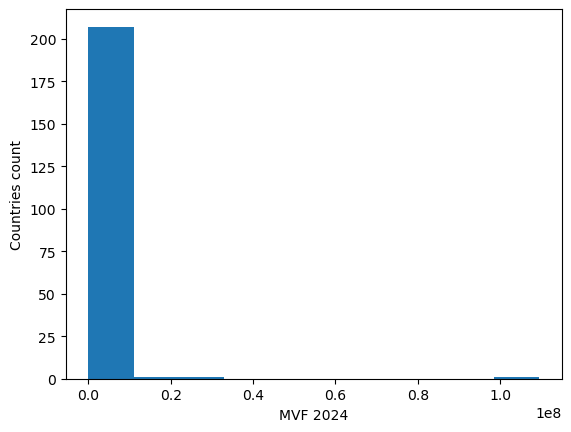

In [108]:
#Побудуйте гістограму для розподілу показників MVF_2024
#серед всіх країн.
import matplotlib.pyplot as plt
mvf_2024 = gdp_table['MVF_2024']
plt.hist(mvf_2024)
plt.xlabel('MVF 2024')
plt.ylabel('Countries count')
plt.show()
#Гістограма показує, що більшість країн мають дуже низькі значення показника MVF_2024.
#Лише кілька країн мають значення, які значно перевищують цей рівень, а саме великі економіки Китай, США, Індія

In [110]:
#Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022).
#Як змінюються частки країн з часом (дати відповідь)?
gdp_table['Share_MVF_2024'] = gdp_table['MVF_2024'] / gdp_table['MVF_2024'].sum()
gdp_table['Share_WorldBank_2023'] = gdp_table['WorldBank_2023'] / gdp_table['WorldBank_2023'].sum()
gdp_table['Share_OON_2022'] = gdp_table['OON_2022'] / gdp_table['OON_2022'].sum()

print("Частки кожної країни у загальному значенні:")
print(gdp_table[['Country', 'Share_MVF_2024', 'Share_WorldBank_2023', 'Share_OON_2022']])
#Економіка США, Китаю, Німеччини скорочується на протязі часу, як і всього світу загалом


Частки кожної країни у загальному значенні:
              Country  Share_MVF_2024  Share_WorldBank_2023  Share_OON_2022
0               World    4.643473e-01          4.840638e-01    4.995119e-01
1       United States    1.220169e-01          1.256165e-01    1.275302e-01
2               China    7.856878e-02          8.169741e-02    8.898532e-02
3             Germany    1.946389e-02          2.045826e-02    2.019612e-02
4               Japan    1.742619e-02          1.934200e-02    2.096519e-02
..                ...             ...                   ...             ...
205          Kiribati    1.318479e-06          1.280914e-06    1.104690e-06
206             Palau    1.305761e-06          1.207456e-06    1.114597e-06
207  Marshall Islands    1.293042e-06          1.303869e-06    1.382100e-06
208             Nauru    6.825568e-07          7.070275e-07    7.282034e-07
209            Tuvalu    2.798059e-07          2.846475e-07    2.922721e-07

[210 rows x 4 columns]


In [111]:
#Завдання 2


In [243]:
#Завантаження датасету
df = pd.read_csv('titanic.csv', sep=',')
df




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [229]:
#Вивести перших 5 рядків.
print(df.head(5))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [230]:
#Визначити розмір датасета.
print(df.shape)


(891, 12)


In [231]:
#Визначити тип даних.
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [244]:
#Визначити наявність пропущених значень.
#При наявності, замінити пропущені значення на середнє значення.
print(df.isnull().sum())
df['Age'].fillna(df['Age'].mean(), inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [235]:
#Ще раз перевірити наявність пропущених значень.
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [236]:
#Перевірити наявність дублікатів. При наявності видалити дублікати
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [237]:
#Вивести описову статистику датасету describe()
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [245]:
#Видалити стовпчик Cabin
df.drop(columns=['Cabin'], inplace=True)


In [246]:
#Сформувати датасет з обраними стовпцями:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]


In [247]:
#Замінити бінарні ознаки (Стать) на 0 і 1
print(df['Sex'].unique())
df.loc[:, 'Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df

['male' 'female']


C:\Users\Саша\AppData\Local\Temp\ipykernel_7840\996164113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Sex'] = df['Sex'].map({'male': 0, 'female': 1})
C:\Users\Саша\AppData\Local\Temp\ipykernel_7840\996164113.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Sex'] = df['Sex'].map({'male': 0, 'female': 1})


,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.000000,7.2500
1,1,1,1,38.000000,71.2833
2,1,3,1,26.000000,7.9250
3,1,1,1,35.000000,53.1000
4,0,3,0,35.000000,8.0500
...,...,...,...,...,...
886,0,2,0,27.000000,13.0000
887,1,1,1,19.000000,30.0000
888,0,3,1,29.699118,23.4500
889,1,1,0,26.000000,30.0000


In [249]:
#Ще раз перевірити кількість пропущених даних
print(df.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


In [250]:
#Вивести 5 перших рядків датасету.
print(df.head(5))


   Survived  Pclass  Sex   Age     Fare
0         0       3    0  22.0   7.2500
1         1       1    1  38.0  71.2833
2         1       3    1  26.0   7.9250
3         1       1    1  35.0  53.1000
4         0       3    0  35.0   8.0500


In [251]:
#Вивести 5 останніх рядків датасету.
print(df.tail(5))

     Survived  Pclass  Sex        Age   Fare
886         0       2    0  27.000000  13.00
887         1       1    1  19.000000  30.00
888         0       3    1  29.699118  23.45
889         1       1    0  26.000000  30.00
890         0       3    0  32.000000   7.75


In [252]:
#Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print(survival_by_sex)
#У чоловіків була менша вірогідність вижити

Sex
0    18.890815
1    74.203822
Name: Survived, dtype: float64


In [253]:
#Обчисліть відсоток виживання для кожного класу (Pclass).
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)
#Найбільший відсоток виживання мала перша група


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [255]:
#Визначте середній вік тих, хто вижив, і тих, хто не вижив.
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
mean_age_not_survived = df[df['Survived'] == 0]['Age'].mean()
print(f"Середній вік виживших: {mean_age_survived}")
print(f"Середній вік не виживших: {mean_age_not_survived}")
#Вік не впливає на виживання, бо різниця мінімальна

Середній вік виживших: 28.549778121775027
Середній вік не виживших: 30.415099646415943


In [256]:
#Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи
fare_bins = [0, 10, 20, 30, 40, 50, 100, 200]
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins)
survival_by_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100
print(survival_by_fare_group)
#Чим преміальніше тариф, тим більше відсоток виживання, принаймні у тарифах від 50-200

FareGroup
(0, 10]       20.560748
(10, 20]      42.458101
(20, 30]      44.366197
(30, 40]      39.655172
(40, 50]      25.000000
(50, 100]     65.420561
(100, 200]    75.757576
Name: Survived, dtype: float64


C:\Users\Саша\AppData\Local\Temp\ipykernel_7840\1446871778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins)


In [257]:
#Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass).
mean_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print(mean_fare_by_class)
#Перший тариф має колосальну різницю у виживанні над іншими тарифами

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [258]:
#Обчисліть середній вік пасажирів для кожного класу (Pclass).
mean_age_by_class = df.groupby('Pclass')['Age'].mean()
print(mean_age_by_class)
#чим вище клас, тим вище середній вік

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64


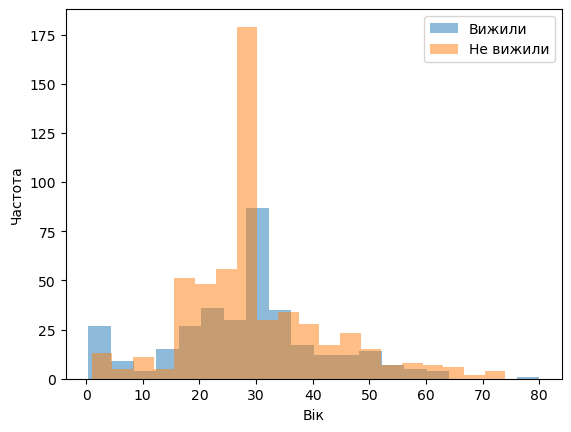

In [259]:
#Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив.
plt.hist(df[df['Survived'] == 1]['Age'], bins=20, alpha=0.5, label='Вижили')
plt.hist(df[df['Survived'] == 0]['Age'], bins=20, alpha=0.5, label='Не вижили')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.legend(loc='upper right')
plt.show()
#У віці 20-40 найбільша частота не виживання

In [260]:
#Обчисліть відсоток виживання для кожної комбінації статі
#та класу (наприклад, жінки в 1-му класі, чоловіки в 3-му класі)
survival_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print(survival_by_sex_class)
#1 група жінок мала найвищу вірогідність виживання серед обох статей з процентом виживання 96%

Sex  Pclass
0    1         36.885246
     2         15.740741
     3         13.544669
1    1         96.808511
     2         92.105263
     3         50.000000
Name: Survived, dtype: float64


In [264]:
#Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare).
correlation = df.corr()
print(correlation['Survived'])
#Чим вище тариф, тим більша вірогідність вижити
#Чим більше люди платили (fare), тим більшу вірогідність мали на виживання


Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.069809
Fare        0.257307
Name: Survived, dtype: float64


C:\Users\Саша\AppData\Local\Temp\ipykernel_7840\1682458601.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [265]:
#Висновок
#На основі завдання 1 Було проаналізовано датасет щодо ВВП країн за три роки.
#Проведено очищення і попередній аналіз даних, визначено основні характеристики.
#Розраховані статистики, кореляції та побудовані візуалізації.
#Отримано відповіді стосовно країн з найвищими/нижчими показниками та їх частки.

#На основі завдання 2 Було проаналізовано датасет про пасажирів Титаніка.
#Проведено очищення і попередній аналіз даних,
#Розраховані статистики та кореляції щодо виживання залежно від
#різних чинників. Отримано відповідні висновки.


